> Игорь Сорочан  
> Преподаватель: Максим Сахаров
# Домашнее задание к лекции «Доверительные интервалы»

In [151]:
import numpy as np # Numeric Python
import pandas as pd # Panel Data
import math
import matplotlib.pyplot as plt
from scipy.stats import norm 

import seaborn as sns # Более продвинутая библиотека для визуализации
import plotly.express as px

<h3 style="text-align: center;"><b>«Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »</b></h3>


#### Confidence Interval
### $CI = \hat{\mu} \pm t_{{\alpha/2}, df} * \frac{\hat\sigma}{\sqrt{n}} = \hat{\mu} \pm t_{{\alpha/2}, df} * SE$  
* $\hat{\mu}$ - среднее в ГС
* $ t_{{\alpha/2};df}$ — двусторонняя критическая величина t-критерий Стьюдента,  
      $\alpha$ - вероятность совершить ошибку $I$ (отвергнуть нулевую гипотезу, в то время как она верна).  
* $df$ — степень свободы = n — 1, от английского «degrees of freedom»
* $SE$ - stanadard error of the mean

In [152]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), st.sem(data)  # Standard Error of the Mean
    # looking for X where t = 0.95
    # To get a 95% margin of error, you want 5% of the probability to be in the tails of the distribution. 
    # This is usually done symmetrically so that 2.5% is in each tail, 
    # so you would use q values of 0.025 and 0.975 for the lower and upper cutoff points respectively. 

    # var1
    h = se * st.t.ppf((1 + confidence)/2, n-1)
    return m - h, m, m + h

    # var2
    # t_stat_lower = st.t.ppf((1 - confidence)/2, n-1)  
    # t_stat_upper = st.t.ppf((1 + confidence)/2, n-1) 
    # return m + se * t_stat_lower, m, m + t_stat_upper

In [153]:
# a =  [5,7,7,9,10,16,7,14,13,15,16,15,
#      16,17,18,13,14,15,6,13, 14, 12 ,13 ]

# print(mean_confidence_interval(a, 0.60))
# print(mean_confidence_interval(a, 0.90))

<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интервалы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



<div class="alert alert-info">
<b>Задача: </b>
    
Попробуем с помощью доверительного интервала оценить, какое минимальное количество штатов надо взять, чтобы определить будущего президента
</div>

In [154]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  on_bad_lines= 'skip') # Откроем датасет

## EDA

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State Postal  4074 non-null   object
 1   County Name   4074 non-null   object
 2   FIPS          4074 non-null   int64 
 3   Obama vote    4074 non-null   object
 4   %             4073 non-null   object
 5   Romney vote   4074 non-null   object
 6   %.1           4073 non-null   object
dtypes: int64(1), object(6)
memory usage: 222.9+ KB


In [156]:
df.isna().sum()

State Postal    0
County Name     0
FIPS            0
Obama vote      0
%               1
Romney vote     0
%.1             1
dtype: int64

##### Steps to select only those dataframe rows, which contain any NaN value  
* **Step 1**: 
Call the `isnull()` function on dataframe like `df.isnull()`. It will return a same sized bool dataframe containing only `True or False` values. True value indicates that there is a NaN at the corresponding position in the original dataframe and False indicates a Non-NaN value.
* **Step 2**: Then call the `any(axis=1)` function on the bool dataframe like, `df.isnull().any(axis=1)`. The any() function looks for any True value along the given axis. If `axis==1`, then it will look along the columns for each row. It means, for each row it will check all the column values and reduce it to a single value. For a row, if any column contains the NaN, then the reduced value for that row will be True. Therefore, it returns a bool Series, where each value represents a row of dataframe. If value is True, then it indicates that there is one or more NaN values in that row.
* **Step 3**: Then pass this bool Series to `[]` operator of dataframe i.e. `df[df.isnull().any(axis=1)]`. It returns only those rows where bool Series has True value. It means it returns only those rows which contain any NaN value.

In [157]:
df[df.isna().any(axis=1)]

,State Postal,County Name,FIPS,Obama vote,%,Romney vote,%.1
1684,ME,Upton,23017,0,NaN,0,NaN


In [158]:
df[df['%']=='#DIV/0!']

,State Postal,County Name,FIPS,Obama vote,%,Romney vote,%.1
1429,ME,Hancock Cty Townships,23009,0,#DIV/0!,0,#DIV/0!


In [159]:
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df.head()

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6


Среднее по всей выборке:  44.07946954813346


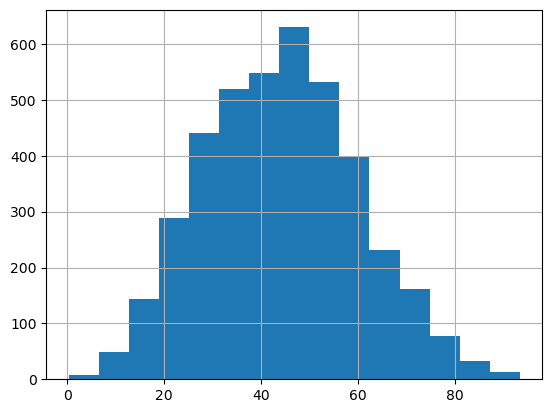

In [160]:
df['%'].hist(bins=15)
print('Среднее по всей выборке: ',df['%'].mean())

In [161]:
some_states_1 = ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']

sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам

l, s, r=mean_confidence_interval(sub_df['%'], 0.99)
l, s, r

(42.02105614141499, 46.23478260869564, 50.44850907597629)

In [162]:
df['State Postal'].value_counts()  # Раскомментить, если интересно соотношение штатов. 

ME    498
MA    352
TX    255
VT    247
NH    238
VA    135
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
OK     78
AR     75
WI     73
AL     68
PA     68
SD     67
LA     65
NY     63
CA     59
MT     57
WV     56
ND     54
ID     45
RI     40
WA     40
OR     37
NM     34
MD     25
NJ     22
NV     18
AZ     16
HI      5
DE      4
DC      2
AK      2
Name: State Postal, dtype: int64

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

## Определение $N$ размера выборки

`Пример` 
Допустим, Вы журналист и оказались в 2016 году в преддверии выборов президента в США.  
Вы хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах.  
Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%?

Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности равно 15.7.  

Дано:  
* погрешность измерений $\Delta$: + - 5 %.  
* стандартное отклонение $\sigma$ = 15.7.

  $$ N = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность в измерениях ( + / - %), 
- $\sigma$ - стандартное отклонение ГС, 
- Z - квантиль нормального распределения


In [163]:
confidence = 0.95
Z = st.norm.ppf((1 + confidence)/2 )  # Квантиль нормального распределения. Z = 1.959963984540054 (95%)
sigma = 15.7  # Стандартное отклонение ГС
Delta = 5 # Погрешность

In [164]:
N = int(np.ceil(  ((sigma * Z)/ Delta)  **2)  )
N

38

# Проверим разумность наших расуждений:

Стандартное отклонение ГС: 15.742
Среднее в ГС: 44.079


<AxesSubplot: >

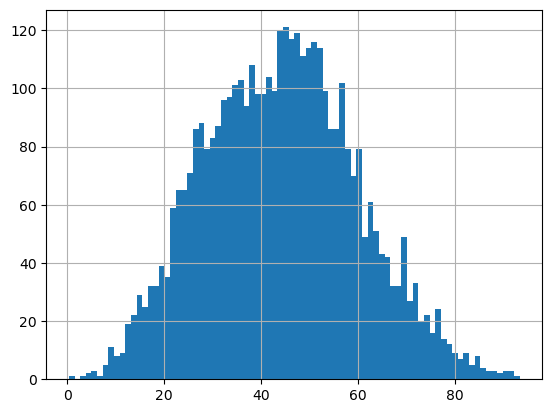

In [165]:
print(f"Стандартное отклонение ГС: {df['%'].std():.3f}")
print(f"Среднее в ГС: {df['%'].mean():.3f}")
df['%'].hist(bins=80)

In [166]:
# Возьмем выборку из случайных n значений
sub_df = df['%'].sample(n = N) 
sub_df.shape

(38,)

In [167]:
# calculating statistics 
mn = sub_df.mean()  # sample Mean
sd = df['%'].std()  # population sigma (sd)
# we know population SIGMA (sd) so we use it instead of SEM 
# se = st.sem(sub_df), sd / np.sqrt (N) # SEM  
mn, sd

(44.19210526315789, 15.742396788859033)

In [168]:
# we know population SIGMA and N > 30 so we use Normal distribution 
ci_low = mn + st.norm.ppf( (1 - confidence)/2 ) * sd/np.sqrt(N)
ci_upp = mn + st.norm.ppf( (1 + confidence)/2 ) * sd/np.sqrt(N)

print(f'Confidence Interval  is: [ {ci_low:5.3f}, {ci_upp:5.3f} ]')

print(f"Среднее выборки: {mn:.3f}  (+- {st.norm.ppf( (1 + confidence)/2 )* sd/np.sqrt(N):3.3f})")
# print(f"Доверительный интервал: ({mn - Delta:.3f}, {mn + Delta:.3f})")
print(f"Среднее генеральной совокупности: {df['%'].mean():.3f}")

Confidence Interval  is: [ 39.187, 49.197 ]
Среднее выборки: 44.192  (+- 5.005)
Среднее генеральной совокупности: 44.079


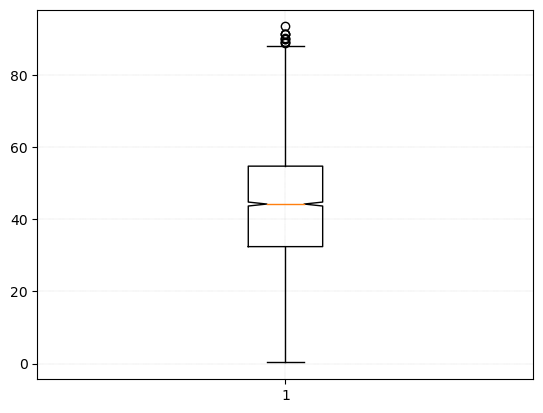

In [169]:
plt.boxplot(df['%'], notch= True) #, conf_intervals=[ci_low,ci_upp])
plt.grid(linestyle=':', linewidth=0.3)
plt.show()

In [170]:
st.norm.ppf(0.95, loc=0, scale=1)

1.6448536269514722

# Проверка гипотез с помощью Python. 

## T-test (Для двух выборок).  Самый важный!!!!!

## $t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}} = \frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}$

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.
</div>

In [171]:
np.random.seed(42)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 


t, p_value = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
t, p_value

(2.4653667464001203, 0.01375151447955999)

In [172]:
stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=2.472112679960154, pvalue=0.013500837093626573)

**Мы получаем хорошее значение p, равное 0,013, и, таким образом, мы отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо**

#### И действительно, если посмотреть на сгенерированные выборки. 

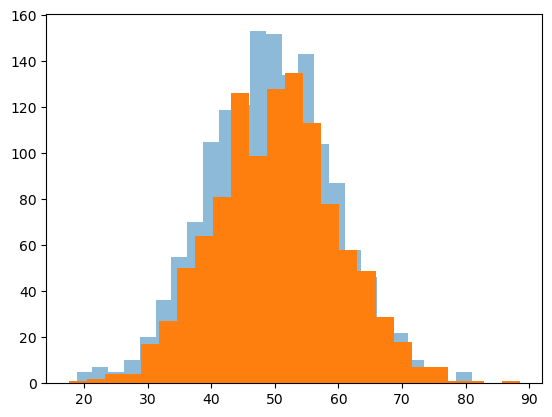

In [173]:
plt.hist(B, bins=25, alpha = 0.5); #Выборка A
plt.hist(A, bins=25);  #Выборка B

Means: A dataset- 50.3, B dataset- 49.4


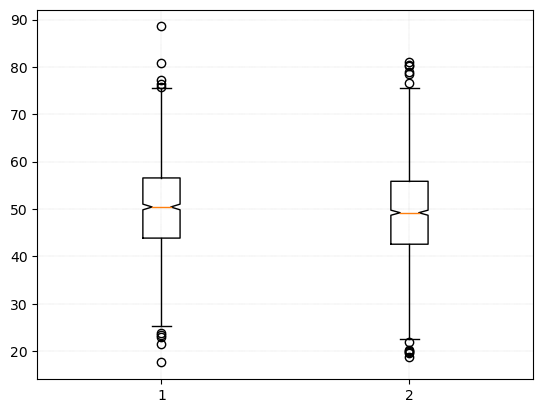

In [174]:
plt.boxplot([A,B], notch= True);
plt.grid(linestyle=':', linewidth=0.3)
print(f'Means: A dataset- {A.mean():.01f}, B dataset- {B.mean():.01f}')

### t-Тест (Критерий Стьюдента имеет несколько разновидностей, ниже приведены еще две). 

# 1. Одновыборочный T-test (Выборка + ГС)

<div class="alert alert-info">
<b>Описание: </b>
Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим некоторое количество голосующих из Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!
</div>

## $t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}} = {\frac {{\bar {x}}-\mu _{0}}{\sqrt {\frac{s^2}{n}}}}$

In [175]:
np.random.seed(54)

population_ages1=st.norm.rvs(loc=23, scale=30, size=15000)   
population_ages2=st.norm.rvs(loc=20, scale=10, size=10000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 
population_ages = population_ages[population_ages > 0 ]
# population_ages.min(), population_ages.max()

In [176]:
luzit_ages1=st.norm.rvs(loc=22, scale=15, size=2000)  # Индия 1
luzit_ages2=st.norm.rvs(loc=23, scale=25, size=2000)
luzit_ages=np.concatenate((luzit_ages1, luzit_ages2)) #Выборка
luzit_ages = luzit_ages[luzit_ages >0 ]

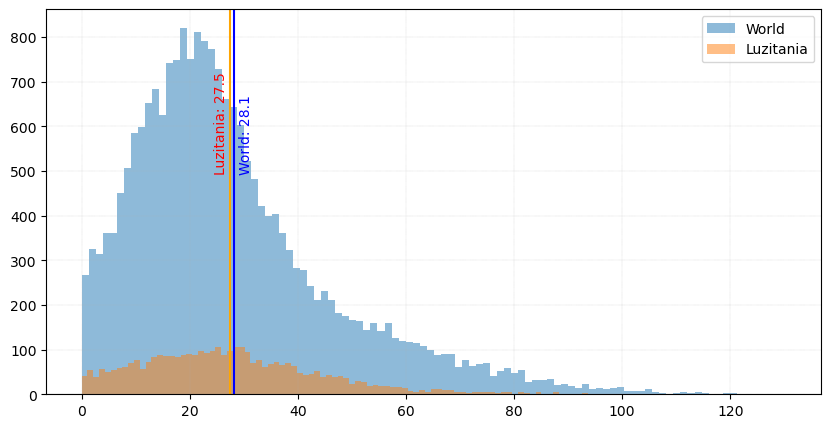

Средний возраст всего мира 28.149523517725374
Средний возраст лузитанцев 27.5391920285891


In [177]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(pd.DataFrame(population_ages), bins=  100, alpha = 0.5, label='World')
plt.axvline(population_ages.mean(),c='b')
plt.text(population_ages.mean()+1,500,f'World: {population_ages.mean():.1f}',c='b',rotation=90)

ax.hist(pd.DataFrame(luzit_ages), bins = 100, alpha = 0.5, label= 'Luzitania')
# plt.vlines(x=luzit_ages.mean(), ymin=25, ymax=2500, colors='orange', ls=':', lw=2, label= 'Luzitania') 
plt.axvline(luzit_ages.mean(),c='orange')
plt.text(luzit_ages.mean()-3,500,f'Luzitania: {luzit_ages.mean():.1f}',c='r',rotation=90)
ax.plot(population_ages.mean())

ax.grid(linestyle=':', linewidth=0.3)
plt.legend()
plt.show()
print('Средний возраст всего мира', population_ages.mean())
print('Средний возраст лузитанцев', luzit_ages.mean())

In [178]:
# Calculate the T-test for the mean of ONE group of scores.

# This is a test for the null hypothesis that the expected value (mean) of 
# a sample of independent observations 'a' is equal to the given population mean, 'popmean'.


stat, p = st.ttest_1samp(a=luzit_ages, popmean=population_ages.mean()) 

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний возраст в Лузитании, вероятно, не отличается от среднего по миру")
else:
    print("Отклоняем нулевую гипотезу, средний возраст в Лузитании, вероятно, отличается от среднего по миру")

Статистика = -2.198, p = 0.028
Отклоняем нулевую гипотезу, средний возраст в Лузитании, вероятно, отличается от среднего по миру


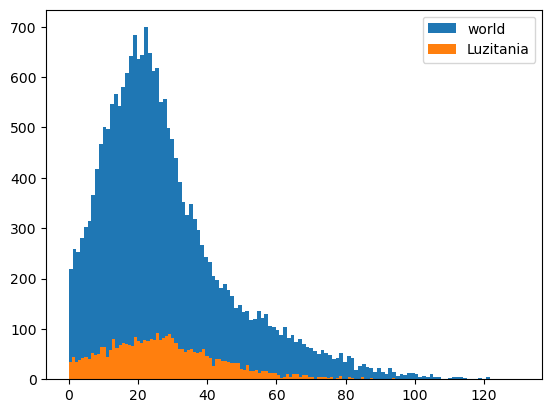

In [179]:
plt.hist(population_ages, bins=120, label= "world"); # Вся популяция.
plt.hist(luzit_ages, bins=120, label= 'Luzitania');  # Выборка
plt.legend()
plt.show()

# 2. Парный T-test (Сравнение зависимых)

<div class="alert alert-info">
<b>Описание: </b>
    
T-критерий парной выборки, иногда называемый `t-критерием` зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном `t-тесте` каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного `t-критерия` выборки включают исследования случай-контроль или планы повторных измерений. 

 Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного `t-критерия`. 
</div>

## $t={\frac {{\bar {X}}_{D}-\mu _{0}}{s_{D}/{\sqrt {n}}}}$

* where ${\bar {X}}_{D}$ and $s_{D}$ are the average and standard deviation of the differences between all pairs.  
 The pairs are e.g. either one person's pre-test and post-test scores or between-pairs of persons matched into meaningful groups.
* The constant $μ_{0}$ is zero if we want to test whether the average of the difference is significantly different. 
* The degree of freedom used is $n − 1$, where $n$ represents the number of pairs.

In [180]:
np.random.seed(42)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,246.884604,246.723127,-0.161477
std,27.245053,27.010808,4.768345
min,171.407647,172.518101,-9.866856
25%,231.972830,229.732678,-4.301303
50%,246.191311,247.144815,0.147536
75%,262.178562,261.714136,2.417852
max,305.568346,306.534314,13.327846


In [181]:
# Calculate the t-test on TWO RELATED samples of scores, a and b.

# This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.
# Returns: statistic (t-statistic), pvalue


stat, p = st.ttest_rel(a=before, b=after)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 0.339, p = 0.736
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


In [182]:
st.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=0.3386438491265269, pvalue=0.7355952264426648)

# Практическое применение t-Тест Стьюдента

<div class="alert alert-info">
<b>Задание: </b>
    
Представим, что вы исследователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рынок манго в течение последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 

Сможели ли вы их разоблачить с помощью t-Тест Стьюдента?
</div>

In [183]:
avocado = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/avocado.csv'
Students = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/StudentsPerformance.csv'

A = pd.read_csv(avocado, sep=',', index_col=0, on_bad_lines= 'skip').AveragePrice[:2000]
B = pd.read_csv(Students, sep=',', index_col=0, on_bad_lines= 'skip')['math score']
tvalue, pvalue = st.ttest_ind(A, B)
print('t_value:',tvalue, '_pvalue: ',pvalue)

t_value: -191.74088043195104 _pvalue:  0.0


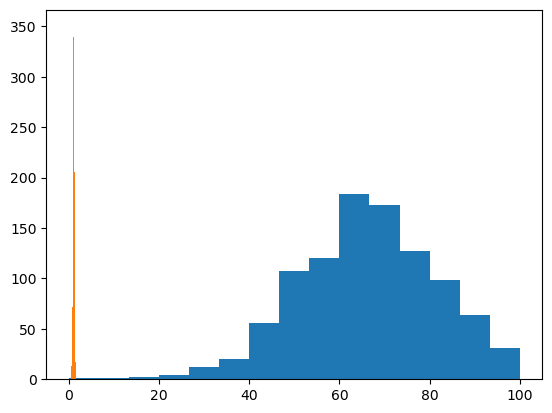

In [184]:
#и действительно выборки пренадлежать разным распределениям, что очевидно

plt.hist(B, bins=15);
plt.hist(A, bins=15);

<div class="alert alert-info">
<b>Дополнительно: </b>
    
Помимо проверки, что выборки могу значимо различаться, t-Тест еще полезен при поиске выбросов в данных.
</div>

# Точный критерий Фишера  и  Критерий пирсона ($\chi^{2}$)

<div class="alert alert-info">
<b>Вспомним: </b>
    
Критерий Стьюдента позволяет работать с численными переменными, но не позволяет работать с категориальными. Для этого существует критерий Фишера (или Хи-квадрат). Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами. Смотри пример в лекции.
    
</div>

<div class="alert alert-info">
<b>Пример: </b>
    
Например, вы хотите проверить нет ли дискриминации 
по половому признаку в сфере Data Science.
Вы узнали, что в какой-то компании после серии собеседований 
107 мужчин взяли на работу, а отказали 93-м мужчинам. 
А среди женщин 74 взяли, а отказали 45-и.
Относится ли руководство компании 
предвзято к мужчинам или к женщинам?
    
</div>

In [185]:
x = [[107,93],[74,45]]
print(x)
oddsratio, pvalue = st.fisher_exact(x) # Точный тест Фишера

print(oddsratio, pvalue)

[[107, 93], [74, 45]]
0.6996512641673932 0.16075942215282235


# Критерий Пирсона (он же $\chi^{2}$ )

**Пример использования Хи-квадрат теста**

<div class="alert alert-info">
<b>Пример: </b>
    
Например, вы хотите проверить правда ли эксперт по Data Science таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица смежности)

Выясните, исходя из полученных данных, действительно ли перед вами носитель экспертности или пока что еще не очень опытный начинающий?
    
</div>

In [186]:
# Сгенерируем случайную матрицу/табличку 2х2
contingency_table = pd.DataFrame(
    [  
[22, 99, 59],
[10, 12, 31]
    ],
    columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Эксперт', 'Случайный прохожий'])

print('Реальная таблица')
print(contingency_table)


Реальная таблица
                    Machine Learning  Data Science  Analytics
Эксперт                           22            99         59
Случайный прохожий                10            12         31


**В качестве проверки мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.**

In [187]:
chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

print(pval)
if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
    print('Это правда эксперт!')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))
    
    
# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value=0.000173, significance=0.05

0.00017303774198262266
На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.
Это правда эксперт!


# Рынок жилья в New York City  или Трюк с распределением

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>


<div class="alert alert-info">
<b>Предостережение: </b>
    
Для построения доверительного интервала с помощью метода, показанного выше, важно, чтобы распределение исследуемой выборки имело нормально распределение
</div>

In [188]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, on_bad_lines='skip')
df.dropna(how='any',inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

<AxesSubplot: >

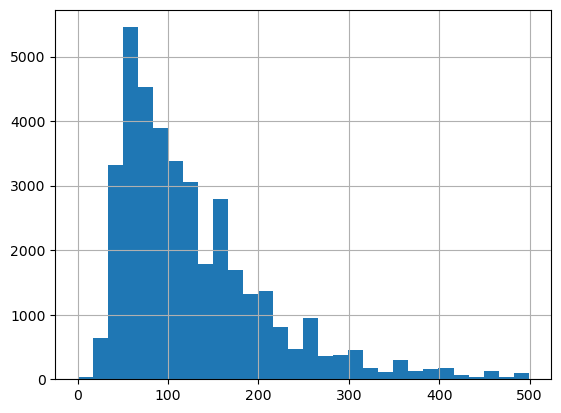

In [190]:
df[df.price<500].price.hist(bins=30)

In [191]:
print('Можно ли использовать тут наш подход?')

Можно ли использовать тут наш подход?


# Теперь сделаем распределение нормальным

<AxesSubplot: >

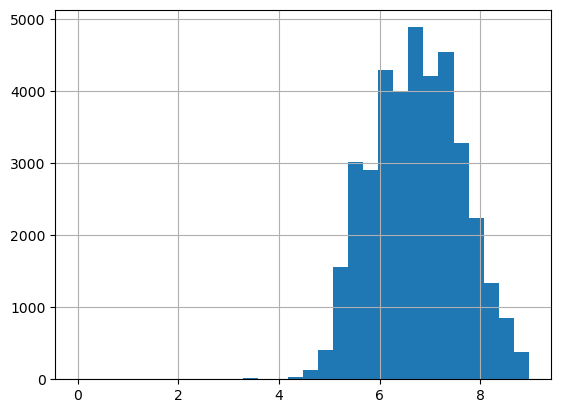

In [192]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=30)

<AxesSubplot: >

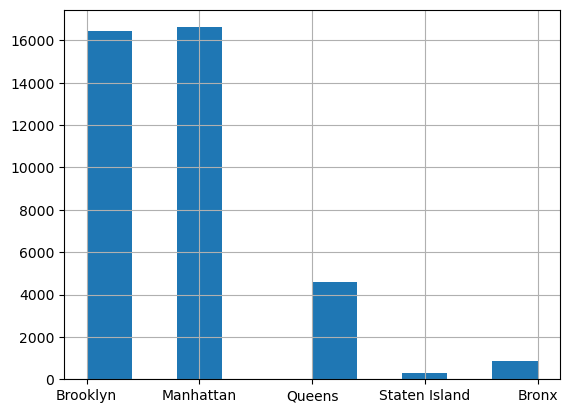

In [193]:
df.neighbourhood_group.hist()

In [194]:
print(df[df.price<400].price.mean())

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.999) # Возможно вам понадобиться эта функция.

122.56345677697612


(111.68856957935898, 115.49388042203987, 119.29919126472075)

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [195]:
confidence = 0.95
Z = st.norm.ppf((1 + confidence)/2 )
disp = 225
sigma = np.sqrt(disp)  
Delta = 3 

n = int(np.ceil(  ((sigma * Z)/ Delta)  **2)  )
print(f'Минимально необходимый объем выборки для построения интервальной оценки среднего: {n}')

Минимально необходимый объем выборки для построения интервальной оценки среднего: 97


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), округленную до целого
</div>

In [201]:
# interval:  Confidence interval with equal areas around the median.
conf = 0.98
sample_size = 25
mn = 130
sigma = 15

sem = sigma / np.sqrt(sample_size)
# We use t-distribution as sample size is less than 30
ci_lower, ci_upper = st.t.interval(confidence = conf, df= sample_size - 1,loc= mn, scale= sem)  
print(f'Мы уверены на {conf * 100:.0f}%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')
L = round(ci_upper - ci_lower)
print(f'Ширина доверительного интервала: {L}')

Мы уверены на 98%, что истинное среднее значение генеральной совокупности находится в диапазоне между 122.524 и 137.476
Ширина доверительного интервала: 15


## 2. Вам даны две выборки роста мужчин и женщин.  
### Докажите, используя t-Тест Стьюдента, что различия между выборками незначительно, 
### если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
* Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно,  
если уровень значимости равен $\alpha$ `= 0.001`.
* Покажите различия визуально
</div>

In [317]:
np.random.seed(42) #фиксация случайности
alpha = 0.001
confidence = 1 - alpha

mens  = st.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

Let's cut off the unreal data. 

In [318]:
mens = mens[(mens > 140) & (mens < 200)]
womens = womens[(womens > 140) & (womens < 200)]

In [319]:
t, p_value = st.ttest_ind(mens, womens)

st.ttest_ind(mens, womens)

Ttest_indResult(statistic=0.8722529531319628, pvalue=0.3830733625094007)

Вероятность получить такие же или более экстремальные результаты составляет 38%,  
поэтому нет оснований отвергнуть Н0.

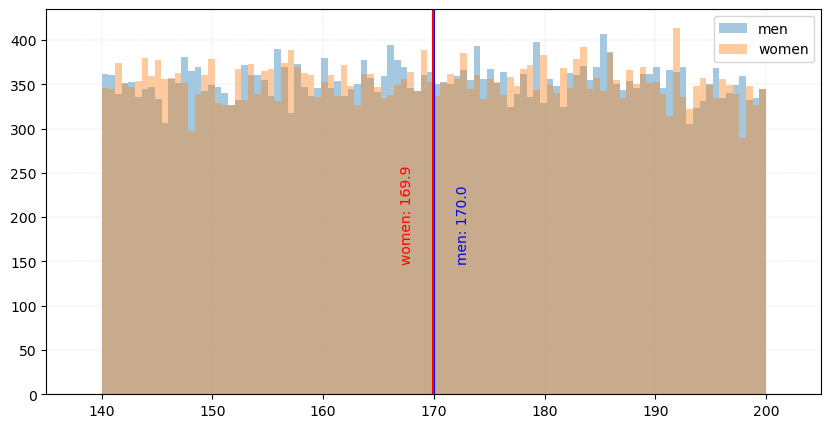

Средний рост мужчин: 170.01 см
Средний рост женщин: 169.90 см
Разница            :   0.11 см


In [331]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(pd.DataFrame(mens), bins=  100, alpha = 0.4, label='men')
plt.axvline(mens.mean(),c='b')
plt.text(mens.mean()+2,150,f'men: {mens.mean():.1f}',c='b',rotation=90)

ax.hist(pd.DataFrame(womens), bins = 100, alpha = 0.4, label= 'women')
# plt.vlines(x=luzit_ages.mean(), ymin=25, ymax=2500, colors='orange', ls=':', lw=2, label= 'Luzitania') 
plt.axvline(womens.mean(),c='r')
plt.text(womens.mean()-3,150,f'women: {womens.mean():.1f}',c='r',rotation=90)
ax.plot(womens.mean())

ax.grid(linestyle=':', linewidth=0.3)
plt.xlim([135, 205])
plt.legend()
plt.show()
print(f'Средний рост мужчин: {mens.mean():.02f} см') 
print(f'Средний рост женщин: {womens.mean():.02f} см')
print(f'Разница{" "*12}:   {mens.mean() - womens.mean():.02f} см')

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [336]:
sigma = 150
confidence = 0.95
delta = 50

  $$ N = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность в измерениях ( + / - %), 
- $\sigma$ - стандартное отклонение ГС, 
- Z - квантиль нормального распределения


In [338]:
Z = st.norm.ppf((1 + confidence)/2 ) 
N = int(np.ceil(  ((sigma * Z)/ delta)  **2)  )
print(f'Минимальный объем выборки: {N}')

Минимальный объем выборки: 35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [199]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [200]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact('Тут должна быть ваша таблица, а не этот текст')#Возможно пригодится эта функция.

### Ваш код...

ValueError: invalid literal for int() with base 10: 'Тут должна быть ваша таблица, а не этот текст'

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test